

ExampleCo, Inc is gathering several types of data for its fleet of very expensive machines.  These very expensive machines have three operating modes: *normal*, *faulty* and *failed*.   The machines run all the time, and usually they are in normal mode.  However, in the event that the machine enters faulty mode, the company would like to be aware of this as soon as possible.  This way they can take preventative action to avoid entering failed mode and hopefully save themselves lots of money.

They collect four kinds of timeseries data for each machine in their fleet of very expensive machines.  When a machine is operating in *normal* mode the data behaves in a fairly predictable way, but with a moderate amount of noise.  Before a machine fails it will ramp into *faulty* mode, during which the data appears visibly quite different.  Finally, when a machine fails it enters a third, and distinctly different, *failed* mode where all signals are very close to 0.


In [18]:

from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
rcParams['figure.figsize'] = 5,4
plt.style.use('seaborn-whitegrid')

In [2]:
cd exampleco_data/

/Users/srikanthadavalli/Python for DataScience/timeseries/exampleco_data


In [3]:
data = pd.read_csv('machine_0.csv')

# plt.plot(range(len(data)), data)
# plt.show
# data.shape
data.rename( columns={'Unnamed: 0':'Time'}, inplace=True )
data.head()



,Time,0,1,2,3
0,00:00.0,12.626096,8.803120,-11.809200,10.083961
1,00:09.6,10.831994,2.816327,11.554778,21.892853
2,00:19.2,21.083510,-0.672645,-17.839178,-1.349024
3,00:28.8,32.294495,6.525132,-13.498586,-4.250752
4,00:38.4,28.057100,3.691359,21.984744,13.670561


In [4]:
data.describe()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
Time    3000 non-null object
0       3000 non-null float64
1       3000 non-null float64
2       3000 non-null float64
3       3000 non-null float64
dtypes: float64(4), object(1)
memory usage: 117.3+ KB
None


### Preprocessing

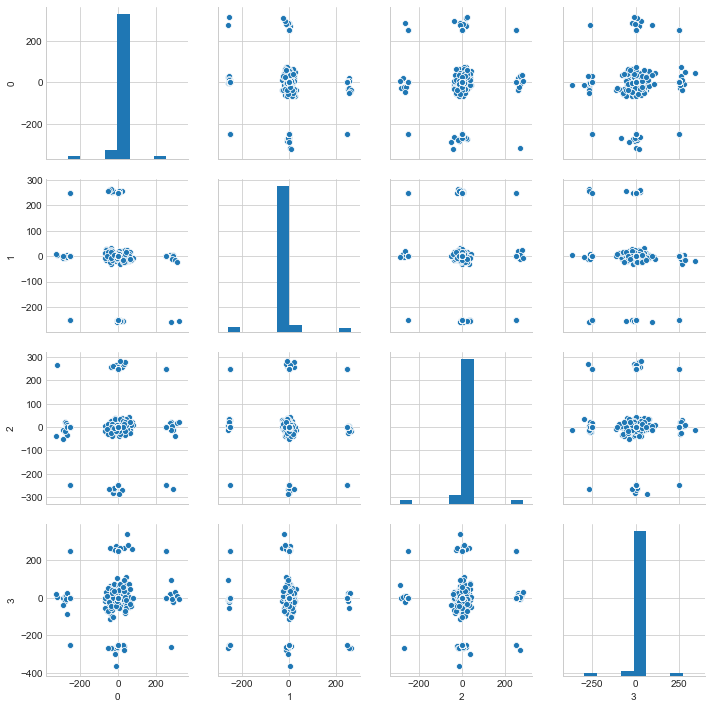

In [5]:
sb.pairplot(data)

In [6]:
data.corr()
data['Time'].value_counts()

00:00.0    2
15:13.5    1
56:11.9    1
37:41.6    1
16:57.9    1
          ..
06:04.9    1
00:03.6    1
42:33.3    1
51:21.4    1
49:03.4    1
Name: Time, Length: 2999, dtype: int64

### Converting to time object

In [17]:
data['Time'] = pd.timedelta_range(0, periods=3000, freq='9T6S')
data.head()

,Time,0,1,2,3,final,target
0,00:00:00,12.626096,8.803120,-11.809200,10.083961,4.925994,False
1,00:09:06,10.831994,2.816327,11.554778,21.892853,11.773988,False
2,00:18:12,21.083510,-0.672645,-17.839178,-1.349024,0.305666,False
3,00:27:18,32.294495,6.525132,-13.498586,-4.250752,5.267572,False
4,00:36:24,28.057100,3.691359,21.984744,13.670561,16.850941,False


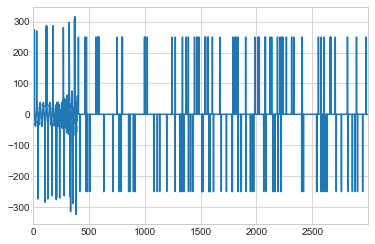

In [8]:
zero = data['0']
zero.plot()

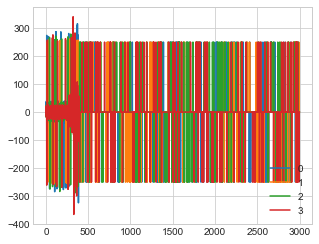

In [9]:
timeserie = data[['0','1','2','3']]
timeserie.plot()

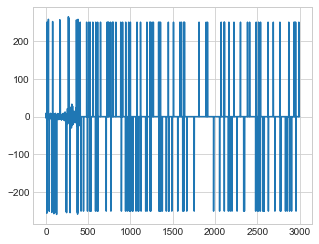

In [10]:
one = data['1']
one.plot()


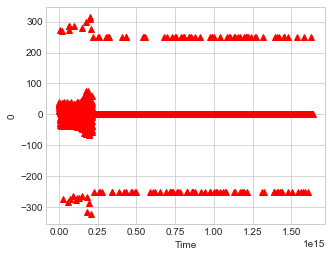

In [11]:
plt.plot(data['Time'],data['0'], 'r^')
plt.xlabel('Time')
plt.ylabel('0')
plt.show()

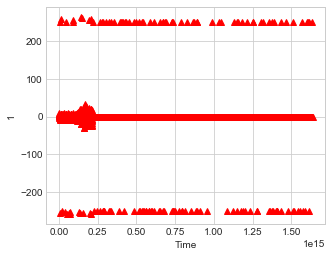

In [12]:
plt.plot(data['Time'],data['1'], 'r^')
plt.xlabel('Time')
plt.ylabel('1')
plt.show()

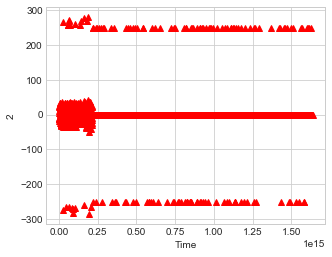

In [13]:
plt.plot(data['Time'],data['2'], 'r^')
plt.xlabel('Time')
plt.ylabel('2')
plt.show()

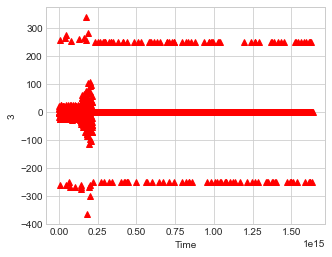

In [14]:
plt.plot(data['Time'],data['3'], 'r^')
plt.xlabel('Time')
plt.ylabel('3')
plt.show()

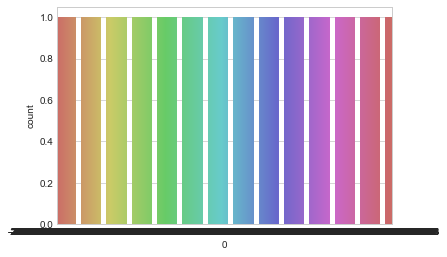

In [16]:
sb.countplot(x='0', data = data, palette='hls')


### Converting categorical variables to dummy variables

In [10]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# zero_dummy = data['0']
# zero_encoded=label_encoder.fit_transform(zero_dummy)
# zero_encoded[0:100]

In [12]:
# data['final'] = data.mean(axis=1)
# data

,Time,0,1,2,3,final
0,0 days 00:00:00,12.626096,8.803120,-11.809200,10.083961,4.925994
1,0 days 00:09:06,10.831994,2.816327,11.554778,21.892853,11.773988
2,0 days 00:18:12,21.083510,-0.672645,-17.839178,-1.349024,0.305666
3,0 days 00:27:18,32.294495,6.525132,-13.498586,-4.250752,5.267572
4,0 days 00:36:24,28.057100,3.691359,21.984744,13.670561,16.850941
...,...,...,...,...,...,...
2995,18 days 22:14:30,0.004364,-0.010959,-0.007210,0.012390,-0.000354
2996,18 days 22:23:36,0.004077,0.000165,-0.003772,0.010053,0.002631
2997,18 days 22:32:42,0.007702,-0.014708,-0.011722,0.001334,-0.004348
2998,18 days 22:41:48,-0.008149,0.000107,-0.017914,0.010599,-0.003839


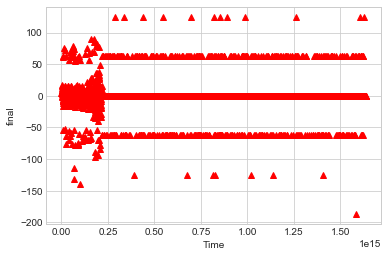

In [13]:
# plt.plot(data['Time'],data['final'], 'r^')
# plt.xlabel('Time')
# plt.ylabel('final')
# plt.show()

In [15]:
data['target'] = data.apply(lambda x:x is 'faulty')
data['target'] = data['target'].apply(lambda x:x is 'faulty')
data[0:50]

,Time,0,1,2,3,final,target
0,00:00:00,12.626096,8.803120,-11.809200,10.083961,4.925994,False
1,00:09:06,10.831994,2.816327,11.554778,21.892853,11.773988,False
2,00:18:12,21.083510,-0.672645,-17.839178,-1.349024,0.305666,False
3,00:27:18,32.294495,6.525132,-13.498586,-4.250752,5.267572,False
4,00:36:24,28.057100,3.691359,21.984744,13.670561,16.850941,False
5,00:45:30,29.646637,-3.522426,3.364964,-3.015832,6.618336,False
6,00:54:36,38.902674,1.916522,-10.849385,-17.702242,3.066892,False
7,01:03:42,33.052626,3.204629,25.474912,1.118645,15.712703,False
8,01:12:48,25.190551,-5.460431,22.956234,-3.472719,9.803409,False
9,01:21:54,29.554267,-3.325767,-5.842399,-25.124870,-1.184692,False
